In [53]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

In [54]:
# Generate a random cluster dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)
centroids = [ [ -6,20 ], [ 3, -4 ], [ -5, 10 ] ]

X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

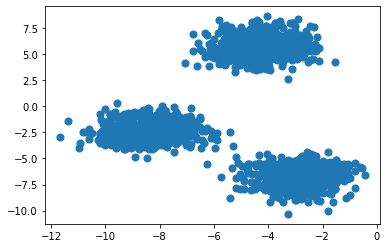

In [55]:
# Ploit the coordinate points
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

In [56]:
# Print the array of y
y

array([2, 2, 1, ..., 1, 0, 2])

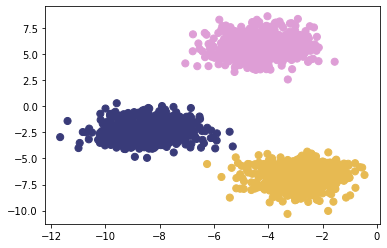

In [57]:
# Print the coordinate points with the correct cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20b')
plt.show()

### Ex. 5 - Implementing k-means with optimization

In [58]:
def dist(a ,b):
    return math.sqrt(math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2))

In [59]:
from scipy.spatial.distance import cdist

In [60]:
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [61]:
for x in X[105:110]:
    calcs = []
    for c in centroids:
        calcs.append(dist(x, c))
    print(calcs, "Cluster Membership: ", np.argmin(calcs, axis=0))

[15.48018387562919, 10.70202290628413, 5.542160268055164] Cluster Membership:  2
[27.494804364076703, 7.208665829113462, 17.44505393393603] Cluster Membership:  1
[15.125554980395098, 11.113179986633003, 5.1589701124301515] Cluster Membership:  2
[23.283725331634837, 8.931464028407861, 13.314157359115697] Cluster Membership:  1
[12.464933982679572, 13.467921029846712, 2.664298385076878] Cluster Membership:  2


In [62]:
def k_means(X, K):
    # Keep track of history so you can see k-means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(K)])
        centroids_history.append(new_centroids)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels, centroids_history, labels_history
centers, labels, centers_hist, labels_hist = k_means(X, 3)

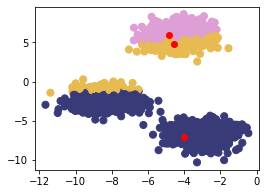

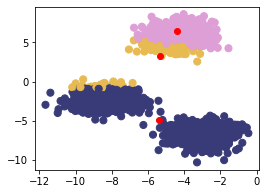

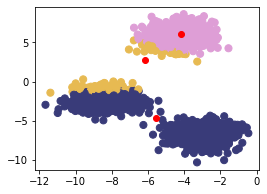

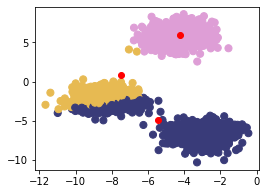

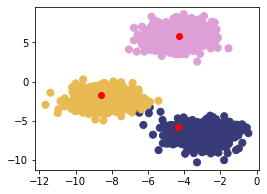

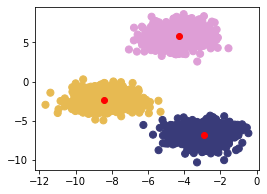

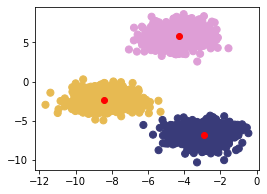

In [63]:
history = zip(centers_hist, labels_hist)
for x, y in history:
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()